In [1]:
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin, sqrt
import matplotlib.pyplot as plt
import random
from math import dist

Let $I$ represent a lens of a function on the cartesian plane. For a point $(x,y,f(x,y))$, $(x,y)$ represents the translation vector and $f(x,y)$ represents the distance between the lens $I$ and $t_{(x,y)}(I)$, where $t_{(x,y)}(I)$ is the image $I$ under a translation by $(x,y)$. 

In [2]:
def get_pixels(num_pixels_x, num_pixels_y, window_x, window_y):
    sample1 = list(np.linspace(-window_x/2, window_x/2, num_pixels_x))
    sample2 = list(np.linspace(-window_y/2, window_y/2, num_pixels_y))
    pixels = []
    for i in range(len(sample1)):
        for j in range(len(sample2)):
            pixels.append((sample1[i],sample2[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

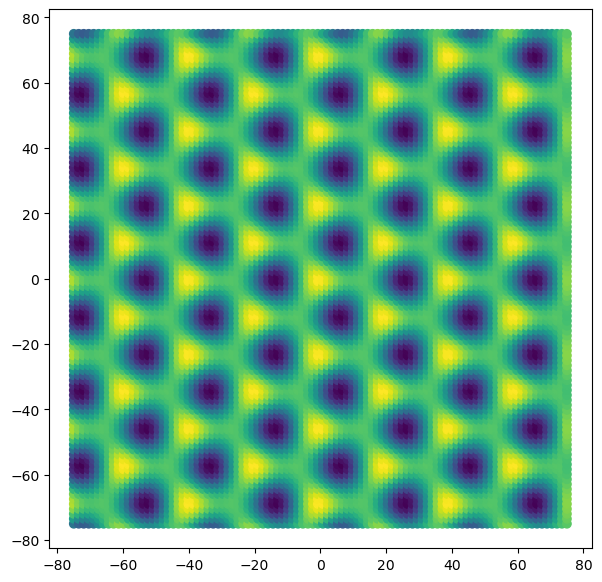

In [3]:
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S


def view_window(image_function, num_pixels_x, num_pixels_y, window_x, window_y):
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    
    x_points = []
    y_points = []
    color = []
    for pixel in pixels:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
        color.append(image_function(pixel[0], pixel[1]))
        
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = color)
    plt.show()
    

view_window(image_function = p3, num_pixels_x=100, num_pixels_y=100, window_x=150, window_y=150)

Let's assume that what is pictured above is the image we have saved. We want to find the two vectors that generate its lattice. 

We begin by choosing a random vector $(x,y)$ to translate the image by. 

***how do we know parameters for where we sample this vector??***

In [62]:
X = 150 * np.random.random(50) - 150/2
Y = 150 * np.random.random(50) - 150/2
x = X[0]
y = Y[0]
print((x,y))

(66.25915915010614, -22.320144403695522)


Next, calculate the Euclidean distance between the original image $I$ and the image under translation by $(x,y)$, $t_{(x,y)}(I)$

In [63]:
pixels = get_pixels(num_pixels_x = 100, num_pixels_y=100, window_x = 50, window_y = 50)
colors1 = get_colors(pixels, image_function = p3)
iso = isom(x,y,0)
colors2 = new_colors(pixels, iso, image_function = p3)
distance = dist(colors1, colors2)
distance

312.4249167210355

In [65]:
max(colors1)

2.99659363202542

Sample new translation vectors from a circle around $(x,y)$

In [4]:
def new_xy(x,y,radius, num_samples):
    length = []
    angle = []
    for i in range(num_samples):
        length.append(sqrt(np.random.uniform(0, radius)))
        angle.append(np.random.uniform(0, 2*pi))

    X = []
    Y = []
    for i in range(num_samples):
        X.append(length[i] * np.cos(angle[i])+x)
        Y.append(length[i] * np.sin(angle[i])+y)
    
    #fig = plt.figure(figsize = (7, 7))
    #ax = plt.axes()
    #scatter = ax.scatter(X,Y)
    #plt.show()
    
    return X,Y 
    

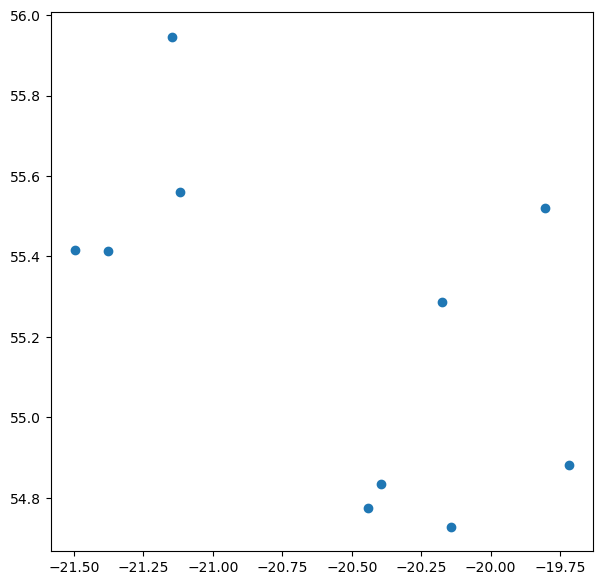

In [38]:
X,Y = new_xy(x,y,radius=1, num_samples=10)

Calculate distance from $I$ to $t_{(x,y)}(I)$ for each new $(x,y)$ pair

In [39]:
dict_of_dists = {}
for i in range(len(X)):
    iso = isom(X[i],Y[i],0)
    colors2 = new_colors(pixels, iso, image_function = p3)
    dict_of_dists[(X[i],Y[i])] = dist(colors1, colors2)
dict_of_dists

{(-20.174091508894357, 55.28574403082352): 65.50588933081451,
 (-20.142333430645234, 54.72778122437824): 85.18910264898811,
 (-21.118389049038463, 55.56135152624076): 75.40045628389755,
 (-19.805509774651583, 55.52164389182959): 54.73439206908486,
 (-21.376037409570667, 55.41354649919889): 86.1881260021329,
 (-21.14674138987609, 55.946197598653605): 67.39067741156238,
 (-19.719896220042305, 54.882426067122836): 78.31789071845712,
 (-20.4409119122285, 54.77468581198218): 86.23497370518325,
 (-21.49480975019506, 55.415651454890664): 89.53336952661482,
 (-20.39450389256168, 54.834908278754654): 83.63267514985422}

Choose the translation pair with the lowest distance to be your new $(x,y)$ and repreat!

In [41]:
x,y = min(dict_of_dists, key=dict_of_dists.get)
print(x,y)

-19.805509774651583 55.52164389182959


Let's put it all together..

In [89]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = 1 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent


X = trans_x_bound * np.random.random(1) - trans_x_bound/2
Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
x = X[0]
y = Y[0]

while True:

    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    iso = isom(x,y,0)
    colors2 = new_colors(pixels, iso, image_function)
    distance1 = dist(colors1, colors2)

    X,Y = new_xy(x,y,radius,num_samples)

    dict_of_dists = {}
    dict_of_dists[(x,y)] = distance1
    for i in range(len(X)):
        iso = isom(X[i],Y[i],0)
        colors_new = new_colors(pixels, iso, image_function = p3)
        dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
    new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)
    
    if new_x == x and new_y == y:
        
        print("switch")
        
        while True:

            iso = isom(x,y,0)
            colors2 = new_colors(pixels, iso, image_function)
            distance1 = dist(colors1, colors2)
        
            X,Y = new_xy(x,y,radius/4,num_samples)

            dict_of_dists = {}
            dict_of_dists[(x,y)] = distance1
            for i in range(len(X)):
                iso = isom(X[i],Y[i],0)
                colors_new = new_colors(pixels, iso, image_function = p3)
                dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
            new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
        
            if new_new_x == x and new_new_y == y:
                distance = dict_of_dists[(x,y)]
                print(str(distance) + " should be the same her")
                break
            else: 
                x,y = new_new_x,new_new_y
                distance = dict_of_dists[(x,y)]
                print(distance)
                print("continue in while loop")
                
        break
                    
    else:  
        x,y = new_x,new_y
        distance = dict_of_dists[(x,y)]
        print(distance)
    
print(x,y)


154.20459607425346
136.445316225554
103.102247780577
89.31273542839324
57.61185212395413
35.30054581832975
7.43561957255729
switch
7.43561957255729 the same?
-0.11021493071588839 -0.1543062427337653


note: its possible to get a translation of approximately (0,0)

In [90]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = 1 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent


X = trans_x_bound * np.random.random(1) - trans_x_bound/2
Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
x = X[0]
y = Y[0]

while True:

    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    iso = isom(x,y,0)
    colors2 = new_colors(pixels, iso, image_function)
    distance1 = dist(colors1, colors2)

    X,Y = new_xy(x,y,radius,num_samples)

    dict_of_dists = {}
    dict_of_dists[(x,y)] = distance1
    for i in range(len(X)):
        iso = isom(X[i],Y[i],0)
        colors_new = new_colors(pixels, iso, image_function = p3)
        dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
    new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)
    
    if new_x == x and new_y == y:
        
        print("switch")
        
        while True:

            iso = isom(x,y,0)
            colors2 = new_colors(pixels, iso, image_function)
            distance1 = dist(colors1, colors2)
        
            X,Y = new_xy(x,y,radius/4,num_samples)

            dict_of_dists = {}
            dict_of_dists[(x,y)] = distance1
            for i in range(len(X)):
                iso = isom(X[i],Y[i],0)
                colors_new = new_colors(pixels, iso, image_function = p3)
                dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
            new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
        
            if new_new_x == x and new_new_y == y:
                distance = dict_of_dists[(x,y)]
                print(str(distance) + " should be the same")
                break
            else: 
                x,y = new_new_x,new_new_y
                distance = dict_of_dists[(x,y)]
                print(distance)
                print("continue")
                
        break
                    
    else:  
        x,y = new_x,new_y
        distance = dict_of_dists[(x,y)]
        print(distance)
    
print(x,y)

254.03278244669264
238.7324303617492
230.72669438780227
216.04123566039306
198.07886902371652
183.45308390066666
166.5884505598449
139.0290441906059
111.14985392572794
100.65459015246212
69.75705737406193
41.695742903277676
28.434163539598927
2.069541962217333
switch
2.069541962217333 the same?
-19.717992465153714 11.348221675289292


In [213]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = 1 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent


X = trans_x_bound * np.random.random(1) - trans_x_bound/2
Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
x = X[0]
y = Y[0]


while True:

    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    iso = isom(x,y,0)
    colors2 = new_colors(pixels, iso, image_function)
    distance1 = dist(colors1, colors2)

    X,Y = new_xy(x,y,radius,num_samples)

    dict_of_dists = {}
    dict_of_dists[(x,y)] = distance1
    for i in range(len(X)):
        iso = isom(X[i],Y[i],0)
        colors_new = new_colors(pixels, iso, image_function = p3)
        dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
    new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)
    
    if new_x == x and new_y == y:
        
        print("switch")
        
        while True:

            iso = isom(x,y,0)
            colors2 = new_colors(pixels, iso, image_function)
            distance1 = dist(colors1, colors2)
        
            X,Y = new_xy(x,y,radius/4,num_samples)

            dict_of_dists = {}
            dict_of_dists[(x,y)] = distance1
            for i in range(len(X)):
                iso = isom(X[i],Y[i],0)
                colors_new = new_colors(pixels, iso, image_function = p3)
                dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
            new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
        
            if new_new_x == x and new_new_y == y:
                distance = dict_of_dists[(x,y)]
                print(str(distance) + " the same?")
                break
            else: 
                x,y = new_new_x,new_new_y
                distance = dict_of_dists[(x,y)]
                print(distance)
                print("continue")
                
        break
                    
    else:  
        x,y = new_x,new_y
        distance = dict_of_dists[(x,y)]
        print(distance)
    
print(x,y)

NameError: name 'new_xy' is not defined

Keep getting (19,11) ish 

We need to find a way to avoid getting the same vector over and over because we need two of them....

I also want to avoid getting something like $(0,0)$

In [10]:
def direction(x,y):
    length = sqrt(x**2 + y**2) 
    if length == 0:
        return (0,0)
    new_x = x/length
    new_y = y/length 
    return (new_x,new_y)

def same_direction(x1,y1,x2,y2,error):
    dir1 = direction(x1,y1)
    dir2 = direction(x2,y2)
    if abs(dir1[0]-dir2[0])<error and abs(dir1[1]-dir2[1])<error:
        return True 
    else:
        return False

In [ ]:
def first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)

    while True:

        iso = isom(x,y,0)
        colors2 = new_colors(pixels, iso, image_function)
        distance1 = dist(colors1, colors2)

        X,Y = new_xy(x,y,radius,num_samples)

        dict_of_dists = {}
        dict_of_dists[(x,y)] = distance1
        for i in range(len(X)):
            iso = isom(X[i],Y[i],0)
            colors_new = new_colors(pixels, iso, image_function)
            dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
        new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)   
        
        #print(new_x,new_y)
    
        if new_x == x and new_y == y:
        
            print("switch")
        
            while True:

                iso = isom(x,y,0)
                colors2 = new_colors(pixels, iso, image_function)
                distance1 = dist(colors1, colors2)
        
                X,Y = new_xy(x,y,radius/4,num_samples)

                dict_of_dists = {}
                dict_of_dists[(x,y)] = distance1
                for i in range(len(X)):
                    iso = isom(X[i],Y[i],0)
                    colors_new = new_colors(pixels, iso, image_function = p3)
                    dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
                new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
            
                #print(new_new_x,new_new_y)
        
                if new_new_x == x and new_new_y == y:
                    distance = dict_of_dists[(x,y)]
                    print('done?')
                    break
                else: 
                    x,y = new_new_x,new_new_y
                    distance = dict_of_dists[(x,y)]
                    print(str(distance) + '2')
                
            break
                    
        else:  
            
            if sqrt(new_x**2 + new_y**2) < 2: 
                X = trans_x_bound * np.random.random(1) - trans_x_bound/2
                Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
                x = X[0]
                y = Y[0]
                print('restart')
                
            else:
                x,y = new_x,new_y
                distance = dict_of_dists[(x,y)]
                print(str(distance) + '1') 
    
    return x,y

In [16]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-19.709209213834836, -11.308512539205175)

In [98]:
def second_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, x_prev, y_prev):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]

    while True:

        pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
        colors1 = get_colors(pixels, image_function)
        iso = isom(x,y,0)
        colors2 = new_colors(pixels, iso, image_function)
        distance1 = dist(colors1, colors2)

        X,Y = new_xy(x,y,radius,num_samples)

        dict_of_dists = {}
        dict_of_dists[(x,y)] = distance1
        for i in range(len(X)):
            iso = isom(X[i],Y[i],0)
            colors_new = new_colors(pixels, iso, image_function)
            dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
    
        new_x,new_y = min(dict_of_dists, key=dict_of_dists.get)   
        
        #print(new_x,new_y)
    
        if new_x == x and new_y == y:
        
            print("switch")
        
            while n == 1:

                iso = isom(x,y,0)
                colors2 = new_colors(pixels, iso, image_function)
                distance1 = dist(colors1, colors2)
        
                X,Y = new_xy(x,y,radius/4,num_samples)

                dict_of_dists = {}
                dict_of_dists[(x,y)] = distance1
                for i in range(len(X)):
                    iso = isom(X[i],Y[i],0)
                    colors_new = new_colors(pixels, iso, image_function = p3)
                    dict_of_dists[(X[i],Y[i])] = dist(colors1, colors_new)
            
                new_new_x,new_new_y = min(dict_of_dists, key=dict_of_dists.get)
            
                #print(new_new_x,new_new_y)
        
                if new_new_x == x and new_new_y == y:
                    distance = dict_of_dists[(x,y)]
                    break
                else: 
                    x,y = new_new_x,new_new_y
                    distance = dict_of_dists[(x,y)]
                    print(distance)
                
            break
                    
        else:  
            
            if sqrt(new_x**2 + new_y**2) < 2: 
                X = trans_x_bound * np.random.random(1) - trans_x_bound/2
                Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
                x = X[0]
                y = Y[0]
                print('restart')
                
            elif same_direction(new_x-x, new_y-y, x_prev, y_prev, 0.5) == True or same_direction(new_x-x, new_y-y, -x_prev, -y_prev, 0.5) == True: 
                X = trans_x_bound * np.random.random(1) - trans_x_bound/2
                Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
                x = X[0]
                y = Y[0]
                print('restart2')
                
            else:
                x,y = new_x,new_y
                distance = dict_of_dists[(x,y)]
                print(str(distance) + '1') 
    
    return x,y

In [22]:
second_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, x_prev = -19.71, y_prev=-11.31)

(19.779153100432072, -11.429874897607403)

In [23]:
second_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, x_prev = -19.71, y_prev=-11.31)

(-0.09335630575900085, 22.772789917568396)

Not guarenteed that we get the same two vectors each time we run this. Seems to be a problem of local versus global minimum.

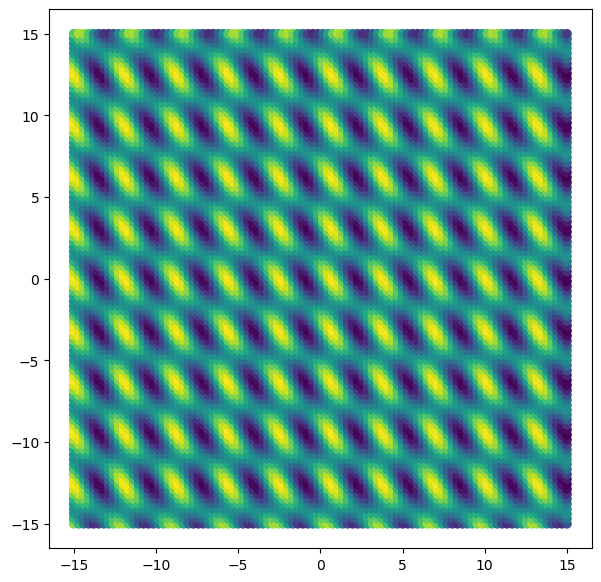

In [28]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

view_window(image_function = sincos, num_pixels_x=100, num_pixels_y=100, window_x=30, window_y=30)

In [53]:
image_function = sincos
window_x = 30 # size of window in x-axis
window_y = 30 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 10 # length of interval to choose x-translation from 
trans_y_bound = 10 # length of interval to choose x-translation from 
radius = .5 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

In [54]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(6.2516810091541455, 0.08414542546195564)

In [55]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-6.1940417885175005, -3.31685718017226)

In [56]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(3.134640350862624, 6.480592850817221)

In [57]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(3.1238046329811224, -0.002530510493618854)

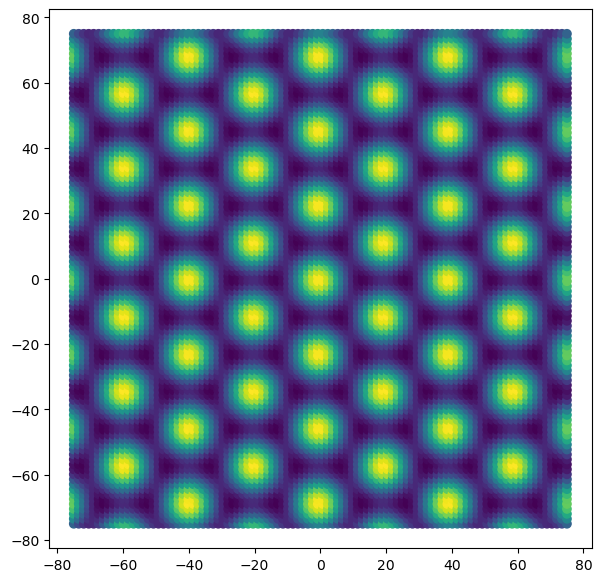

In [61]:
def p6(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C 

view_window(image_function = p6, num_pixels_x=100, num_pixels_y=100, window_x=200, window_y=200)

In [67]:
image_function = p6
window_x = 200 # size of window in x-axis
window_y = 200 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = 1 # radius to sample new translations from (length of steps in gradient descent)
num_samples = 10 # number of points to choose from for each step in gradient descent

In [72]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(0.17191401942324858, 22.868252858797057)

In [69]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(19.748358067539325, -11.536532338483605)

In [74]:
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

148.61867673550816
137.490439578055
119.18157768553826
97.42616999802472
81.72870172161407
60.63991086431531
43.12819316873333
25.98188028838391
11.282038917122964
9.568296678003081


(-19.390691179750103, 11.353850326000696)

In [95]:
radius = 8
first_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

206.579501436855651
195.72272750674751
163.8151569379711
121.032954950331291
79.778361128344671
66.735889264683651
restart
54.666826170942671
22.2840649969279421
switch
done?


(0.808203809161219, 22.92378044261062)

In [100]:
x_prev = -19.4
y_prev = 11.35
second_vector(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, x_prev, y_prev)

restart2
79.723706040421061
restart
144.861279546600231
restart2
restart2
152.920176461967881
restart2
restart2
135.848531746434051
94.169161411489041
restart2
125.496890935046321
81.772074371639351
restart
157.573538714548361
106.908397862224691
48.905881898531881
22.629514380887271
switch


(-19.175659299196656, 11.991216781195101)

# New algorithm 

In [13]:
def direction(x,y):
    length = sqrt(x**2 + y**2) 
    if length == 0:
        return (0,0)
    new_x = x/length
    new_y = y/length 
    return (new_x,new_y)

def magnitude(x,y):
    return sqrt(x**2 + y**2) 

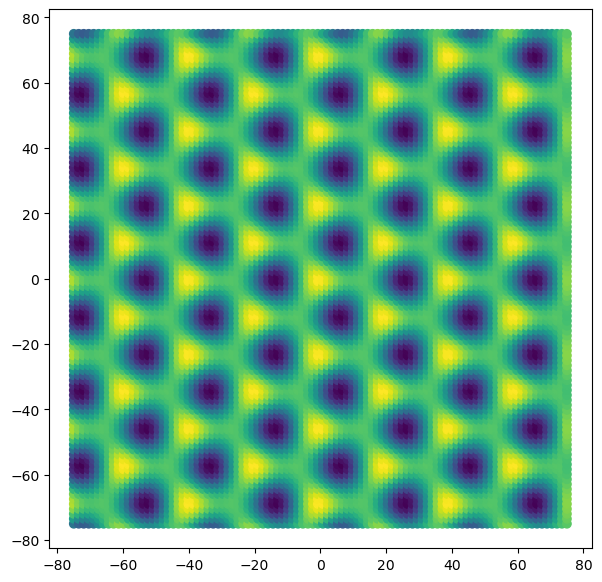

In [9]:
view_window(image_function = p3, num_pixels_x=100, num_pixels_y=100, window_x=150, window_y=150)

In [10]:
# pick a random translation 
X = 150 * np.random.random(50) - 150/2
Y = 150 * np.random.random(50) - 150/2
x = X[0]
y = Y[0]
print((x,y))

(68.75464206097931, 21.994325523125454)


In [11]:
def gradient(x,y,radius, colors1, image_function, pixels):
    
    x_translation1 = isom(x + radius,y,0)
    x_translation2 = isom(x - radius,y,0)
    y_translation1 = isom(x, y + radius,0)
    y_translation2 = isom(x, y - radius,0)
    
    colors_x1 = new_colors(pixels, x_translation1, image_function)
    colors_x2 = new_colors(pixels, x_translation2, image_function)
    colors_y1 = new_colors(pixels, y_translation1, image_function)
    colors_y2 = new_colors(pixels, y_translation2, image_function)
    
    partial_f_x = 1/(2*radius) * (dist(colors1, colors_x1) - dist(colors1, colors_x2))
    
    partial_f_y = 1/(2*radius) * (dist(colors1, colors_y1) - dist(colors1, colors_y2))
    
    dir_descent = direction(-partial_f_x,-partial_f_y)
    
    mag = magnitude(partial_f_x,partial_f_y)
    
    return dir_descent, mag

In [37]:
def grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)

    while True:
        
        dir_descent, mag = gradient(x,y,radius,colors1,image_function, pixels)
        
        x = x + mag/20 * dir_descent[0]
        y = y + mag/20 * dir_descent[1]
        
        colors2 = new_colors(pixels, isom(x,y,0), image_function)
        distance = dist(colors1, colors2)
        
        print('trans: ' + '(' + str(x) + ', ' + str(y) + '), ' + 'distance: ' + str(distance) + ', mag: ' + str(mag))
    
        if dist((x,y),(0,0)) < 2:
            print('restart')
            X = trans_x_bound * np.random.random(1) - trans_x_bound/2
            Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
            x = X[0]
            y = Y[0]
            
        if distance < 1: 
            break 
    
    return x,y

In [38]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = 1 # radius to sample new translations from 

In [39]:
grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius)

trans: (19.75728968998567, 33.547510524799115), distance: 25.237483891667086, mag: 38.46562850057255
trans: (19.732026555505385, 34.79523601602466), distance: 23.824770483186448, mag: 24.95962441558605
trans: (19.74741435912591, 33.61670401435003), distance: 22.517554920093406, mag: 23.572649095691247
trans: (19.73726220860684, 34.730525812192916), distance: 21.284282065413105, mag: 22.277361275610037
trans: (19.743868466528685, 33.67756015852971), distance: 20.128139096493076, mag: 21.059727542759152
trans: (19.739113882134173, 34.6732830348996), distance: 19.036810646501593, mag: 19.914684557874264
trans: (19.74234829721178, 33.73149623887123), distance: 18.00983736014454, mag: 18.83584700101667
trans: (19.7398332663501, 34.622450248737294), distance: 17.0401049267799, mag: 17.8191511927662
trans: (19.74159233624125, 33.7794463154116), distance: 16.1258561047173, mag: 16.86011537243424
trans: (19.740126393846335, 34.577205482759794), distance: 15.262141912591506, mag: 15.955210284733

(19.740210428597766, 34.164716618204814)

In [93]:
def grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    
    i = 1

    while True:
        
        colors2 = new_colors(pixels, isom(x,y,0), image_function)
        distance = dist(colors1, colors2)
        print('trans: ' + '(' + str(x) + ', ' + str(y) + '), ' + 'distance: ' + str(distance))
        
        if distance < 100: 
            i += 2
            
        
        dir_descent, mag = gradient(x,y,radius,colors1,image_function, pixels)
        
        new_x = x + (1/i) * dir_descent[0]
        new_y = y + dir_descent[1]
        
        colors2 = new_colors(pixels, isom(new_x,new_y,0), image_function)
        distance = dist(colors1, colors2)
        x = new_x
        y = new_y
        

    
        if dist((x,y),(0,0)) < 2:
            print('restart')
            X = trans_x_bound * np.random.random(1) - trans_x_bound/2
            Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
            x = X[0]
            y = Y[0]
            
        if distance < 1: 
            break 
    
    return x,y

In [94]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 

In [95]:
grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius)

trans: (8.55245384269184, 37.89616193542936), distance: 284.2380715835678
trans: (8.689963928799566, 38.88666230202124), distance: 281.89079582943356
trans: (8.079815559957977, 39.67894947722979), distance: 276.5534063584103
trans: (7.280160012511642, 40.27940847286422), distance: 266.26536378346907
trans: (6.465972520489586, 40.86001051198812), distance: 251.09897655428298
trans: (5.651842157219609, 41.44069265533498), distance: 231.30626839655255
trans: (4.8408089204456966, 42.02569273127346), distance: 207.2219314516618
trans: (4.033303825295473, 42.615553326080764), distance: 179.25613139752718
trans: (3.2288018631231887, 43.2095033179664), distance: 147.89145232752296
trans: (2.4263099647228206, 43.80616633257496), distance: 113.67900367979144
trans: (1.6244968976982195, 44.403741269757404), distance: 77.23255166141017
trans: (1.3568303075555836, 44.99972060555079), distance: 57.0851536400972
trans: (1.1737780047976405, 45.40258083115685), distance: 45.94839033434587
trans: (1.032

KeyboardInterrupt: 

In [138]:
def view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y):

    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    trans = isom(x_trans,y_trans,0)
    
    x_points = []
    y_points = []
    color1 = []
    for pixel in pixels:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
        color1.append(image_function(pixel[0], pixel[1]))
    
    color2 = new_colors(pixels,trans,image_function)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    ax1.scatter(x_points, y_points, c = color1)
    ax2.scatter(x_points, y_points, c = color2)

In [169]:
def grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    
    while True:
        
        colors2 = new_colors(pixels, isom(x,y,0), image_function)
        distance = dist(colors1, colors2)
        print('trans: ' + '(' + str(x) + ', ' + str(y) + '), ' + 'distance: ' + str(distance))
        
        if distance > 200: 
            i = 10
        elif 100 < distance <= 200:
            i = 3
        elif 30 < distance <= 100:
            i = 1
        elif 10 < distance <= 30:
            i = .5
        else:
            i = .1
            
        
        dir_descent, mag = gradient(x,y,radius,colors1,image_function, pixels)
        
        new_x = x + i * dir_descent[0]
        new_y = y + i * dir_descent[1]
        
        x = new_x
        y = new_y
        

    
        if dist((x,y),(0,0)) < 2:
            print('restart')
            X = trans_x_bound * np.random.random(1) - trans_x_bound/2
            Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
            x = X[0]
            y = Y[0]
            
        if distance < close_enough: 
            print('final: ' + str((x,y)))
            break 
    
    return x,y

In [178]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
close_enough = 2 # how far from exact translation 

trans: (-27.667800860521076, 6.989865018311093), distance: 268.95266063047757
trans: (-19.35320905044036, 12.54572346068871), distance: 47.37299587408454
trans: (-19.661590703530393, 11.594460744065453), distance: 8.35638465623619
trans: (-19.695114898344702, 11.500247537124746), distance: 4.43111852672869
trans: (-19.728604538695624, 11.40602204169402), distance: 0.5589385243162514
final: (-19.802375732614372, 11.338510480107859)


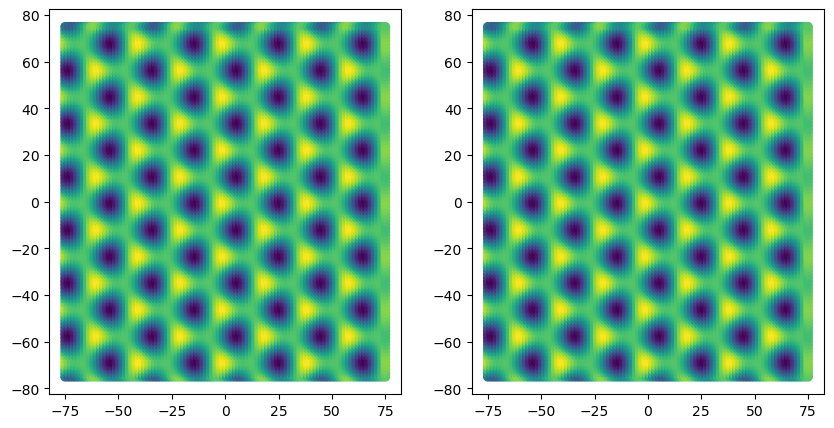

In [179]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

trans: (-42.51887147450282, -8.610859496051923), distance: 272.8873892453031
trans: (-37.768107249433285, 0.18858589998295905), distance: 66.18541473763402
trans: (-38.76187566810757, 0.07712142113157477), distance: 27.962681163217322
trans: (-39.25893149280412, 0.02294110057855369), distance: 8.579769334597962
trans: (-39.358459468538825, 0.013236357091344847), distance: 4.6931667894028255
trans: (-39.45807610859955, 0.004488498895603297), distance: 0.8105212698039139
final: (-39.55575440350612, -0.016934635892402166)


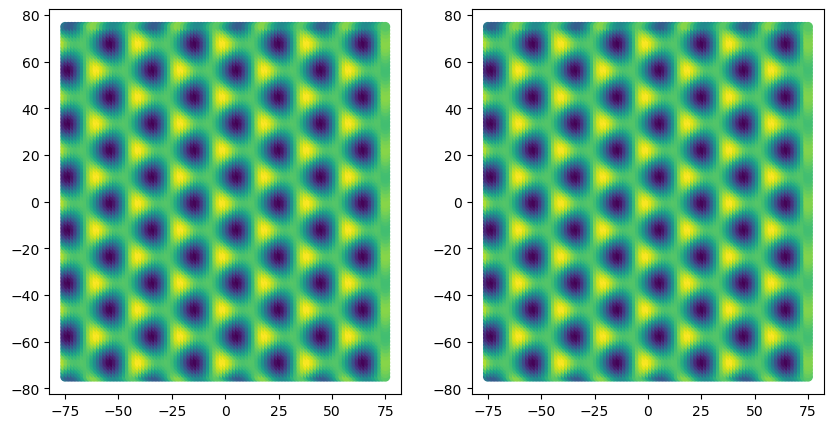

In [180]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

trans: (11.00128814787854, 14.886606318547209), distance: 272.1078730267723
trans: (20.272334651787425, 11.138580608608864), distance: 23.0405477334351
trans: (19.82344584168606, 11.358805121698982), distance: 3.594737065643297
trans: (19.730332387919056, 11.395272706312998), distance: 0.3482242855708787
final: (19.829469956674988, 11.408377761107358)


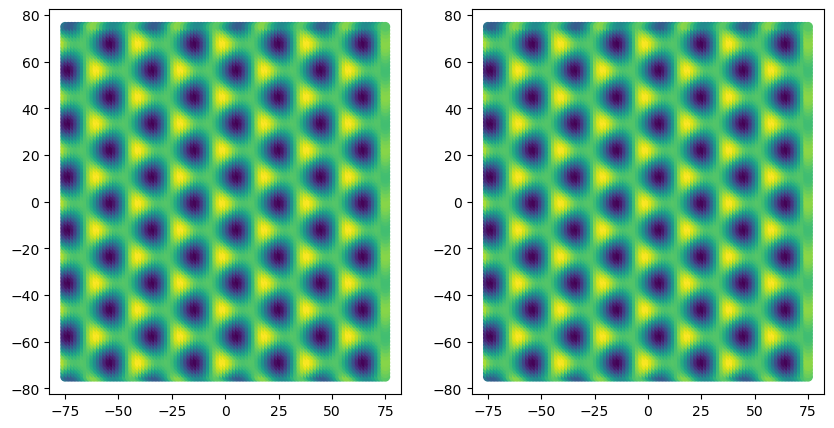

In [181]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

In [183]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
close_enough = 10 # how far from exact translation 

trans: (-6.502229516770676, -10.687172614929842), distance: 301.2994231506446
trans: (-3.504137437980949, -1.1471807969512593), distance: 137.84516140296554
restart
trans: (48.548918296572324, 3.7455464864052033), distance: 277.3239138760961
trans: (38.72605323527981, 1.8716943076998749), distance: 78.3540294919145
trans: (39.096713958513746, 0.942925968310718), distance: 39.88110802032257
trans: (39.46547327541333, 0.013401054067019857), distance: 0.7292083944676468
final: (39.53449955379551, -0.05895482263076897)


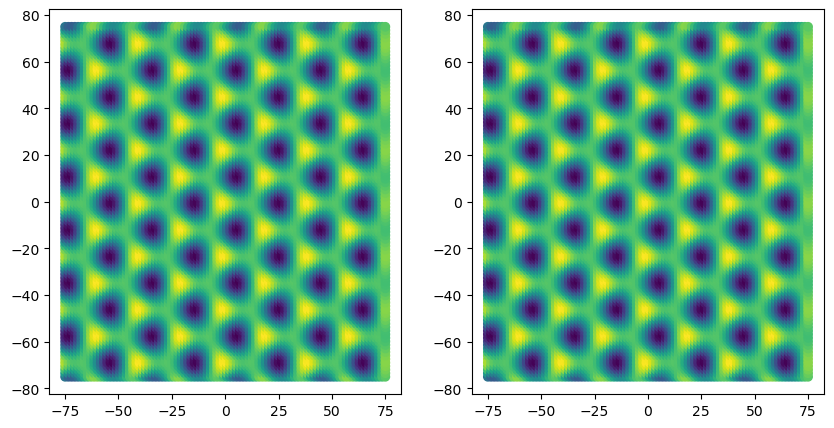

In [184]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

trans: (34.955736198607184, 7.993331798141654), distance: 275.99679160471015
trans: (40.28892253749642, -0.46581257198735315), distance: 36.317750993009156
trans: (39.426181757418284, 0.03983389184896846), distance: 2.566440488311022
final: (39.50642331219098, -0.019842677151434056)


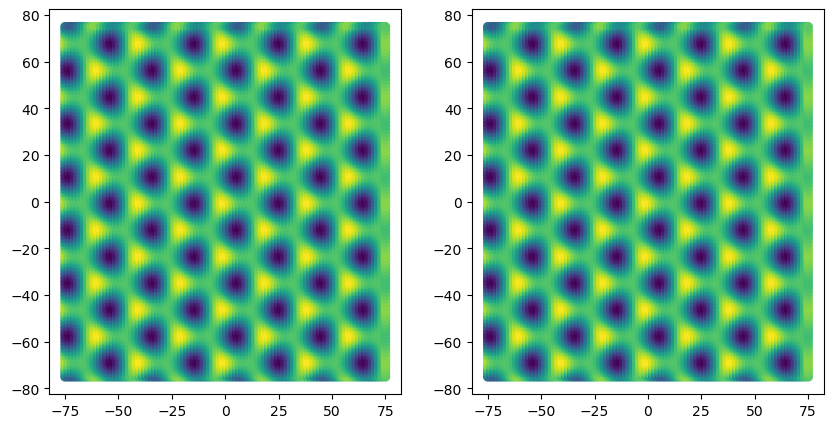

In [185]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

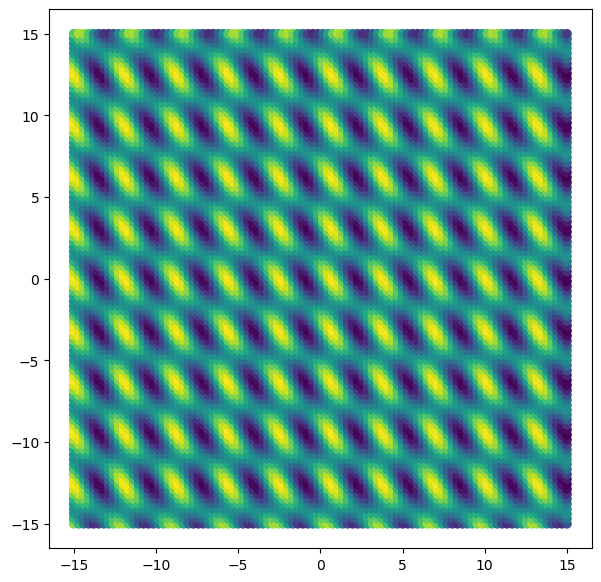

In [4]:
def sincos(x,y):
    return sin(2 * x + y) * cos(y)

view_window(image_function = sincos, num_pixels_x=100, num_pixels_y=100, window_x=30, window_y=30)

In [187]:
image_function = sincos
window_x = 100 # size of window in x-axis
window_y = 100 # size of window in y-axis
num_pixels_x = 100 # number of horizontal pixels in lens
num_pixels_y = 100 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
close_enough = 2 # how far from exact translation 

In [188]:
x_trans,y_trans = grad_des_output(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, close_enough)
view_trans(pixels, x_trans, y_trans, image_function, window_x, window_y)

trans: (-9.818286117568087, -7.116453914344394), distance: 71.99974991308821
trans: (-8.912788582598983, -6.692102392413722), distance: 35.51357098771316
trans: (-9.894299559137405, -6.883508251609809), distance: 69.95356032984103
trans: (-9.002554002605706, -6.430971112353846), distance: 34.89949161674565
trans: (-9.929240990410914, -6.8068051536972405), distance: 69.70971744074276
trans: (-9.0377087844912, -6.35384784245486), distance: 34.75061640392842
trans: (-9.949052244781535, -6.765494653915893), distance: 69.63543689162307
trans: (-9.057373852827677, -6.312825188055227), distance: 34.71404447333655
trans: (-9.960412176663185, -6.74238517884156), distance: 69.61136847777058
trans: (-9.06859781870422, -6.289983641556109), distance: 34.70750336337643
trans: (-9.966932456510527, -6.729295465341232), distance: 69.60337921412517
trans: (-9.07502734954832, -6.2770728650935945), distance: 34.70827995836202
trans: (-9.970671762294959, -6.721843689131916), distance: 69.60067372466088
tra

KeyboardInterrupt: 

In [8]:
def small_dist(image_function, num_pixels_x, num_pixels_y, window_x, window_y, num_sample):

    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    
    trans_x = trans_x_bound * np.random.random(num_sample) - trans_x_bound/2
    trans_y = trans_y_bound * np.random.random(num_sample) - trans_y_bound/2
    
    isos = []
    for i in range(num_sample):
        isos.append(isom(trans_x[i], trans_y[i], 0))
        
    color1 = get_colors(pixels, image_function)
        
    distances = []
    for iso in isos:
        color2 = new_colors(pixels,iso,image_function)
        distances.append(dist(color1,color2))
    distances = np.array(distances)
    
    return min(distances)/2

In [461]:
def general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    p10, p25, p50, p75 = ave_dist(image_function, num_pixels_x, num_pixels_y, window_x, window_y, num_sample)
    close_enough = p10 
    
    i = 0
    distances = []
    learning_rate_x = window_x/10
    learning_rate_y = window_y/10
    
    while True:
        
        colors2 = new_colors(pixels, isom(x,y,0), image_function)
        distance = dist(colors1, colors2)
        print('trans: ' + '(' + str(x) + ', ' + str(y) + '), ' + 'distance: ' + str(distance))
        distances.append(distance)
        learning_rate_x = window_x/10
        learning_rate_x = window_y/10
        
        dir_descent, mag = gradient(x,y,radius,colors1,image_function, pixels)
        
        if i > 0 and distances[i] > distances[i-1]:
            learning_rate_x = learning_rate_x/4
            learning_rate_y = learning_rate_y/4
            
        if distances[i] < p50:
            learning_rate_x = learning_rate_x/2
            learning_rate_y = learning_rate_y/2   
        
        if distances[i] < p:
            learning_rate_x = learning_rate_x/2
            learning_rate_y = learning_rate_y/2
            
        x = x + learning_rate_x * dir_descent[0]
        y = y + learning_rate_y * dir_descent[1]
        
        i += 1
        
        if dist((x,y),(0,0)) < 2:
            print('restart')
            X = trans_x_bound * np.random.random(1) - trans_x_bound/2
            Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
            x = X[0]
            y = Y[0]
            
        if distance < close_enough: 
            print('final: ' + str((x,y)))
            break 
    
    return x,y

In [23]:
def general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_sample):
    X = trans_x_bound * np.random.random(1) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
    x = X[0]
    y = Y[0]
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)
    close_enough = small_dist(image_function, num_pixels_x, num_pixels_y, window_x, window_y, num_sample)
    #print(close_enough)
    
    
    
    while True:
        
        colors2 = new_colors(pixels, isom(x,y,0), image_function)
        distance = dist(colors1, colors2)
        #print('trans: ' + '(' + str(x) + ', ' + str(y) + '), ' + 'distance: ' + str(distance))
        
        learning_rates = (close_enough * np.random.random(5)).tolist()
        learning_rates.extend((np.random.random(5)).tolist())
        
        dir_descent, mag = gradient(x,y,radius,colors1,image_function, pixels)
        
        possibilities = []
        for rate in learning_rates:
            new_x = x + rate * dir_descent[0]
            new_y = y + rate * dir_descent[1]
            colors2 = new_colors(pixels, isom(new_x,new_y,0), image_function)
            possibilities.append(dist(colors1, colors2))
    
        m = min(possibilities)
        index = possibilities.index(m)
        
        x = x + learning_rates[index] * dir_descent[0]
        y = y + learning_rates[index] * dir_descent[1]
        
        if dist((x,y),(0,0)) < 2:
            #print('restart')
            X = trans_x_bound * np.random.random(1) - trans_x_bound/2
            Y = trans_y_bound * np.random.random(1) - trans_y_bound/2
            x = X[0]
            y = Y[0]
            
        if distance < close_enough: 
            #print('final: ' + str((x,y)) + ', distance: ' + str(distance))
            break 
    
    return x,y

In [24]:
image_function = sincos
window_x = 100 # size of window in x-axis
window_y = 100 # size of window in y-axis
num_pixels_x = 50 # number of horizontal pixels in lens
num_pixels_y = 50 # number of vertical pixels in lens
trans_x_bound = 50 # length of interval to choose x-translation from 
trans_y_bound = 50 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
num_samples = 10 # how many to sample to get close_enough

In [25]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius,num_samples)

(-12.7483180897562, -5.865260684796998)

In [26]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-0.050502858617800295, 25.172841627148753)

In [27]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-12.45153558240641, 6.374171285977447)

In [28]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 50 # number of horizontal pixels in lens
num_pixels_y = 50 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
num_samples = 10 # how far from exact translation 

In [29]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-0.04699388245039979, 22.938205665181407)

In [30]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-19.595274436669293, -34.98335642850911)

In [31]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(-19.572021964889885, -11.618987750501054)

In [32]:
general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples)

(19.753883920070347, 11.389369123928923)

In [42]:
def grad_des_2vec(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, num_descents):
    vectors = []
    for i in range(num_descents):
        vectors.append(general_grad_des(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples))
        
    lengths = {}
    for vector in vectors: 
        lengths[vector] = dist(vector,(0,0))
    lengths_list = [(k, v) for k, v in lengths.items()]
    lengths_list.sort(key=lambda s: s[1])
    
    while same_direction_pm(lengths_list[0][0][0], lengths_list[0][0][1], lengths_list[1][0][0],lengths_list[1][0][1], 1) == True:
        del lengths_list[1]
    vector1 = lengths_list[0][0]
    vector2 = lengths_list[1][0]
    
    return vector1,vector2

In [45]:
image_function = p3
window_x = 150 # size of window in x-axis
window_y = 150 # size of window in y-axis
num_pixels_x = 30 # number of horizontal pixels in lens
num_pixels_y = 30 # number of vertical pixels in lens
trans_x_bound = 100 # length of interval to choose x-translation from 
trans_y_bound = 100 # length of interval to choose x-translation from 
radius = .1 # radius to sample new translations from 
num_samples = 10 # how far from exact translation 
num_descents = 5

grad_des_2vec(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, radius, num_samples, num_descents)

((19.730460637222105, -11.40972207522445),
 (39.51873919925772, 22.786560006476293))

# Naive algorithm 

In [226]:
from scipy.spatial.distance import cdist

In [44]:
def same_direction_pm(x1,y1,x2,y2,error):
    dir1 = direction(x1,y1)
    dir2 = direction(x2,y2)
    if abs(dir1[0]-dir2[0])<error and abs(dir1[1]-dir2[1])<error:
        return True 
    elif abs(dir1[0]+dir2[0])<error and abs(dir1[1]+dir2[1])<error:
        return True
    else:
        return False

In [373]:
def approx_trans(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, num_samples):

    X = trans_x_bound * np.random.random(num_samples) - trans_x_bound/2
    Y = trans_y_bound * np.random.random(num_samples) - trans_y_bound/2

    M = np.zeros((num_samples, num_pixels_x * num_pixels_y))
    
    pixels = get_pixels(num_pixels_x, num_pixels_y, window_x, window_y)
    colors1 = get_colors(pixels, image_function)

    
    distances = {}    
    for i in range(num_samples):
        x = X[i]
        y = Y[i]
        iso = isom(X[i],Y[i],0)
        colors2 = new_colors(pixels, iso, image_function)
        distances[(X[i], Y[i])] = (cdist(np.array(colors1).reshape(1,-1),np.array(colors2).reshape(1,-1), metric='euclidean')).tolist()[0][0]
    
    distances_list = [(k, v) for k, v in distances.items()]
    distances_list.sort(key=lambda s: s[1])
    keys = [i[0] for i in distances_list[:10]]
    
    lengths = {}
    for i in keys: 
        lengths[i] = dist(i,(0,0))
    lengths_list = [(k, v) for k, v in lengths.items()]
    lengths_list.sort(key=lambda s: s[1])
    
    while same_direction_pm(lengths_list[0][0][0], lengths_list[0][0][1], lengths_list[1][0][0],lengths_list[1][0][1], 1) == True:
        del lengths_list[1]
    vector1 = lengths_list[0][0]
    vector2 = lengths_list[1][0]
    
    return vector1, vector2

In [376]:
image_function = p3
num_pixels_x = 30
num_pixels_y = 30
window_x = 200
window_y = 200
trans_x_bound = 100
trans_y_bound = 100
num_samples = 1000

approx_trans(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, num_samples)

((0.5940221730208677, 0.6535040717935772),
 (-18.441309291271956, 33.77428814775324))

In [378]:
approx_trans(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, num_samples)

((-19.09152818604869, -10.728987171708312),
 (-20.248120692157357, 12.48098303411144))

In [379]:
approx_trans(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, num_samples)

((-18.61584308797257, 11.508940396790294),
 (-19.931822844722735, -11.452098636988183))

In [381]:
image_function = sincos
window_x = 100 # size of window in x-axis
window_y = 100 # size of window in y-axis
num_pixels_x = 30 # number of horizontal pixels in lens
num_pixels_y = 30 # number of vertical pixels in lens
trans_x_bound = 50 
trans_y_bound = 50
num_samples = 1000

approx_trans(image_function, num_pixels_x, num_pixels_y, window_x, window_y, trans_x_bound, trans_y_bound, num_samples)

((3.2698170271922393, 6.050883122585994),
 (-9.6084247019135, 9.610114005541817))